In [38]:
#Import the necessary library for Purchase Analytics
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle as pc

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [39]:
#Import the data to be used for the analytics
data=pd.read_csv("purchase data.csv")

#Import the Scaler saved
scaler=pc.load(open("scaler.pickle", "rb"))

#Import the PCA
pca=pc.load(open("pca.pickle", "rb"))

#Import K-means
kmeans_pca=pc.load(open("kmeans_pca.pickle", "rb"))

#Standardisation
attributes=data[["Sex", "Marital status", "Age", "Education", "Income", "Occupation", "Settlement size"]]
data_seg=scaler.transform(attributes)

#Apply PCA to the data seg
data_seg_pca=pca.transform(data_seg)

#Segment data
purc_seg_pca=kmeans_pca.predict(data_seg_pca)

#Create a copy of the data frame
purc_seg_pred=data.copy()

#Add the purchase label and segment to the data
purc_seg_pred["Segment"]=purc_seg_pca

#Add segment labels using Dummies
brand_dummies=pd.get_dummies(purc_seg_pca, prefix="Brand", prefix_sep="_")
purc_seg_pred=pd.concat([purc_seg_pred, brand_dummies], axis=1)

purc_data=purc_seg_pred

# Purchase Probability Model

In [42]:
#Create the variables that let us predict what would happen
Y=purc_data["Incidence"] # This is to examine whether the purchases occur or not and this represents our dependent variable

In [58]:
#This is to use average price of all the five brands as a single predictors whether customers would make a purchase or not
X=pd.DataFrame()
X["Avg_Price"]=(purc_data["Price_1"]+
               purc_data["Price_2"]+
               purc_data["Price_3"]+
               purc_data["Price_4"]+
               purc_data["Price_5"])/5

In [59]:
#Build a purchase model using Logistic Model
Purch_Model=LogisticRegression(solver="sag")
Purch_Model.fit(X,Y)

LogisticRegression(solver='sag')

In [60]:
#To shows the exact probability of purchase as the coefficient of relationship between brand incidence and avg brand price
Purch_Model.coef_

array([[-2.3602518]])

# Price Elasticity of Purchase Probability

In [61]:
#To see the range of prices available in the purchase dataset
purc_data[["Price_1", "Price_2", "Price_3", "Price_4", "Price_5"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price_1,58693.0,1.392074,0.091139,1.10,1.34,1.39,1.47,1.59
Price_2,58693.0,1.780999,0.170868,1.26,1.58,1.88,1.89,1.90
Price_3,58693.0,2.006789,0.046867,1.87,1.97,2.01,2.06,2.14
Price_4,58693.0,2.159945,0.089825,1.76,2.12,2.17,2.24,2.26
Price_5,58693.0,2.654798,0.098272,2.11,2.63,2.67,2.70,2.80


In [62]:
#Set up price range for the Brand as this will be used in predicting the elasticity of purchase probability
P_range=np.arange(0.3, 4,0.01)
P_range

array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84,
       0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95,
       0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06,
       1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17,
       1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28,
       1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39,
       1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 ,
       1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61,
       1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72,
       1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.

In [63]:
#We  store this in data frame so that we can use it to predict the purchase probability
P_range_df=pd.DataFrame(P_range)

In [64]:
#From the above output, 1 shows the instance where customer would purchase and 0 shows the instance where no purchase

In [65]:
#Thus, we the price range is used here to predict the purchase incidence probability of customer
Y_pred_pro=Purch_Model.predict_proba(P_range_df)
Y_pred_pro

array([[0.0526116 , 0.9473884 ],
       [0.05380053, 0.94619947],
       [0.05501478, 0.94498522],
       [0.05625479, 0.94374521],
       [0.05752106, 0.94247894],
       [0.05881405, 0.94118595],
       [0.06013425, 0.93986575],
       [0.06148216, 0.93851784],
       [0.06285825, 0.93714175],
       [0.06426303, 0.93573697],
       [0.06569701, 0.93430299],
       [0.06716069, 0.93283931],
       [0.06865459, 0.93134541],
       [0.07017921, 0.92982079],
       [0.07173508, 0.92826492],
       [0.07332273, 0.92667727],
       [0.07494268, 0.92505732],
       [0.07659545, 0.92340455],
       [0.0782816 , 0.9217184 ],
       [0.08000165, 0.91999835],
       [0.08175614, 0.91824386],
       [0.08354561, 0.91645439],
       [0.08537061, 0.91462939],
       [0.08723167, 0.91276833],
       [0.08912936, 0.91087064],
       [0.09106421, 0.90893579],
       [0.09303678, 0.90696322],
       [0.0950476 , 0.9049524 ],
       [0.09709723, 0.90290277],
       [0.09918622, 0.90081378],
       [0.

In [66]:
#Thus, we the price range is used here to predict the purchase incidence of customer
Y_predicted=Purch_Model.predict(P_range_df)
Y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
#From the above, second columns represent the probability that customers make purchase and it is segregated here
Purch_Prob=Y_pred_pro[:][:,1]

##### Elasticity=beta * price * (1-Prob(Purchase))

In [68]:
#Price elasticticy computation using the formulae above
pe=Purch_Model.coef_[:,0]*P_range*(1-Purch_Prob)

In [69]:
#Create a dataframe for different price elasticities
Price_Elasts=pd.DataFrame(P_range)

In [70]:
Price_Elasts=Price_Elasts.rename(columns={0: "Pricing"})
Price_Elasts["AVG Price Elasticity"]=pe
Price_Elasts.head(20)

,Pricing,AVG Price Elasticity
0,0.30,-0.037253
1,0.31,-0.039365
2,0.32,-0.041552
3,0.33,-0.043816
4,0.34,-0.046160
5,0.35,-0.048586
6,0.36,-0.051096
7,0.37,-0.053692
8,0.38,-0.056377
9,0.39,-0.059154


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

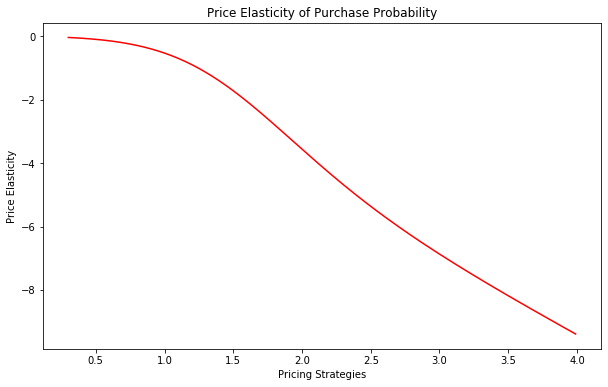

In [71]:
plt.figure(figsize=(10,6))
plt.plot(P_range, pe, color="r")
plt.xlabel("Pricing Strategies")
plt.ylabel("Price Elasticity")
plt.title("Price Elasticity of Purchase Probability")

# Purchase Probability by Segments

### Segment 1 - Career-Focused

In [72]:
#The career-focused segment 1
seg1=purc_data[purc_data["Segment"]==1]

In [73]:
Y1=seg1["Incidence"]
X1=pd.DataFrame()
X1["AVG Price"]=(seg1["Price_1"]+
               seg1["Price_2"]+
               seg1["Price_3"]+
               seg1["Price_4"]+
               seg1["Price_5"])/5

In [74]:
seg1_incidence=LogisticRegression(solver="sag")
seg1_incidence.fit(X1, Y1)

LogisticRegression(solver='sag')

In [75]:
seg1_incidence.coef_

array([[-1.72293392]])

In [76]:
#Thus, we the price range is used here to predict the purchase incidence of customer
seg1_pred=seg1_incidence.predict(P_range_df)
seg1_pred_pro=seg1_incidence.predict_proba(P_range_df)
seg1_pred_pro=seg1_pred_pro[:][:,1]
#Price elasticticy computation using the formulae above
pe1=seg1_incidence.coef_[:,0]*P_range*(1-seg1_pred_pro)

In [77]:
#Add the price elasticity of segment 1 to the dataframe
Price_Elasts["AVG Price Elasticity Seg 1"]=pe1
Price_Elasts.head(20)

,Pricing,AVG Price Elasticity,AVG Price Elasticity Seg 1
0,0.30,-0.037253,-0.052588
1,0.31,-0.039365,-0.055188
2,0.32,-0.041552,-0.057854
3,0.33,-0.043816,-0.060589
4,0.34,-0.046160,-0.063392
5,0.35,-0.048586,-0.066266
6,0.36,-0.051096,-0.069212
7,0.37,-0.053692,-0.072230
8,0.38,-0.056377,-0.075323
9,0.39,-0.059154,-0.078492


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

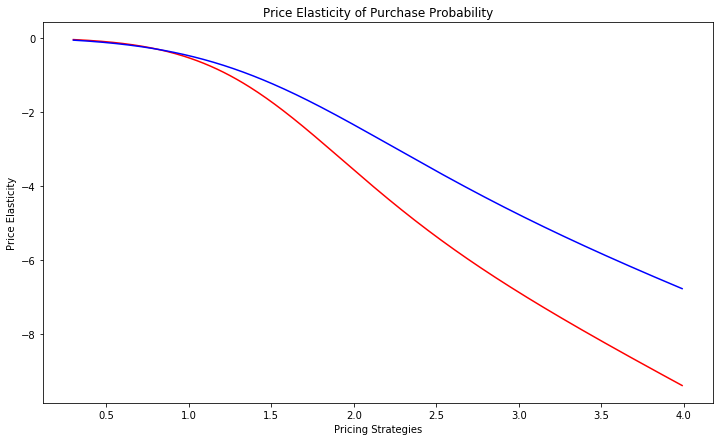

In [78]:
plt.figure(figsize=(12,7))
plt.plot(P_range, pe, color="r")
plt.plot(P_range, pe1, color="b")
plt.xlabel("Pricing Strategies")
plt.ylabel("Price Elasticity")
plt.title("Price Elasticity of Purchase Probability")

# Purchase Probability by Segments

### Segment 2: Fewer-opportunities

In [79]:
#The Fewer-Opportunities segment 1
seg2=purc_data[purc_data["Segment"]==2]

#Logistic Regression factors
Y2=seg2["Incidence"]
X2=pd.DataFrame()
X2["AVG Price"]=(seg2["Price_1"]+
               seg2["Price_2"]+
               seg2["Price_3"]+
               seg2["Price_4"]+
               seg2["Price_5"])/5

seg2_incidence=LogisticRegression(solver="sag")
seg2_incidence.fit(X2, Y2)

#Thus, we the price range is used here to predict the purchase incidence of customer
seg2_pred=seg2_incidence.predict(P_range_df)
seg2_pred_pro=seg2_incidence.predict_proba(P_range_df)
seg2_pred_pro=seg2_pred_pro[:][:,1]
#Price elasticticy computation using the formulae above
pe2=seg2_incidence.coef_[:,0]*P_range*(1-seg2_pred_pro)

#Add the price elasticity of segment 1 to the dataframe
Price_Elasts["AVG Price Elasticity Seg 2"]=pe2


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

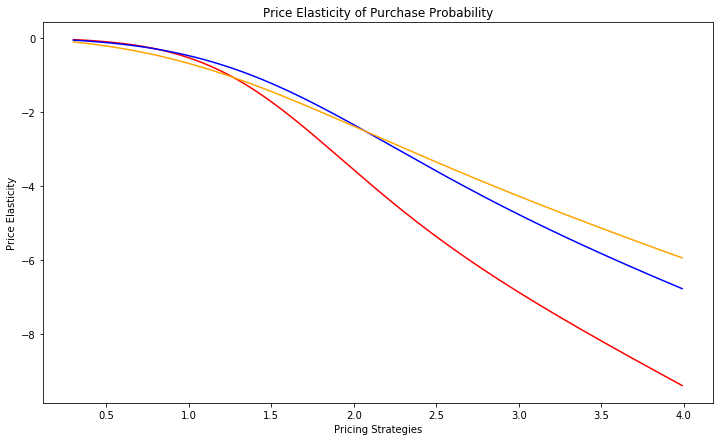

In [80]:
plt.figure(figsize=(12,7))
plt.plot(P_range, pe, color="r")
plt.plot(P_range, pe1, color="b")
plt.plot(P_range, pe2, color="orange")
plt.xlabel("Pricing Strategies")
plt.ylabel("Price Elasticity")
plt.title("Price Elasticity of Purchase Probability")

# Purchase Probability by Segments

### Segment 3: Well-Off

In [81]:
#The Well-Off segment 1
seg3=purc_data[purc_data["Segment"]==3]

#Logistic Regression factors
Y3=seg3["Incidence"]
X3=pd.DataFrame()
X3["AVG Price"]=(seg3["Price_1"]+
               seg3["Price_2"]+
               seg3["Price_3"]+
               seg3["Price_4"]+
               seg3["Price_5"])/5

seg3_incidence=LogisticRegression(solver="sag")
seg3_incidence.fit(X3, Y3)

#Thus, we the price range is used here to predict the purchase incidence of customer
seg3_pred=seg3_incidence.predict(P_range_df)
seg3_pred_pro=seg3_incidence.predict_proba(P_range_df)
seg3_pred_pro=seg3_pred_pro[:][:,1]
#Price elasticticy computation using the formulae above
pe3=seg3_incidence.coef_[:,0]*P_range*(1-seg3_pred_pro)

#Add the price elasticity of segment 1 to the dataframe
Price_Elasts["AVG Price Elasticity Seg 3"]=pe3


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

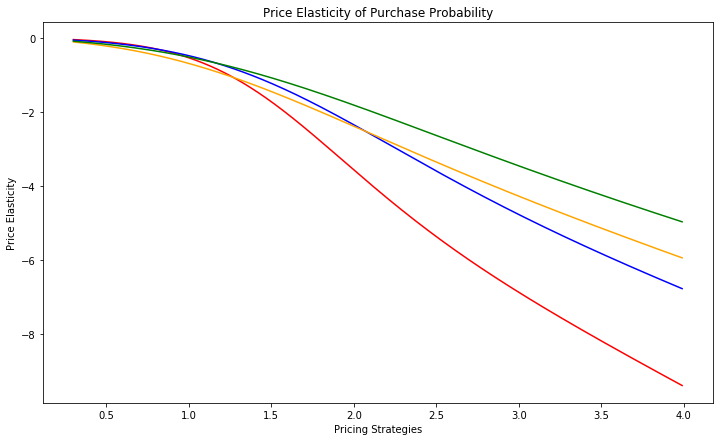

In [82]:
#Plot the new viusals
plt.figure(figsize=(12,7))
plt.plot(P_range, pe, color="r")
plt.plot(P_range, pe1, color="b")
plt.plot(P_range, pe2, color="orange")
plt.plot(P_range, pe3, color="green")
plt.xlabel("Pricing Strategies")
plt.ylabel("Price Elasticity")
plt.title("Price Elasticity of Purchase Probability")

# Purchase Probability with Promotion Feature

In [85]:
#Logistic Regression factors using Promotion as a predicting feature
YP=purc_data["Incidence"]

#Using that Promotion feature as predicting
XP=pd.DataFrame()
XP["AVG Promption"]=(purc_data["Promotion_1"]+
               purc_data["Promotion_2"]+
               purc_data["Promotion_3"]+
               purc_data["Promotion_4"]+
               purc_data["Promotion_5"])/5


array([[0.78009511]])

In [86]:
#Model estimation

Promo_incidence=LogisticRegression(solver="sag")
Promo_incidence.fit(XP, YP)
Promo_incidence.coef_

array([[0.78581225]])

# Price Elasticity with Promotion

In [112]:
#Thus, we the promotion range is used here to predict the purchase incidence of customer
Elast_promotion_price=P_range_df.rename(columns={0:"Price_Range"})
#Elast_promotion_price['Promotion']=1
Elast_promotion_price.head()

,Price_Range
0,0.30
1,0.31
2,0.32
3,0.33
4,0.34


In [118]:
YP_Promo_Predict=Promo_incidence.predict_proba(Elast_promotion_price)


promo=YP_Promo_Predict[:, 1]

pe_promo=Promo_incidence.coef_[:,0]*P_range*(1-YP_Promo_Predict[:, 1])


Text(0.5, 1.0, 'Promotion Elasticity of Purchase Probability')

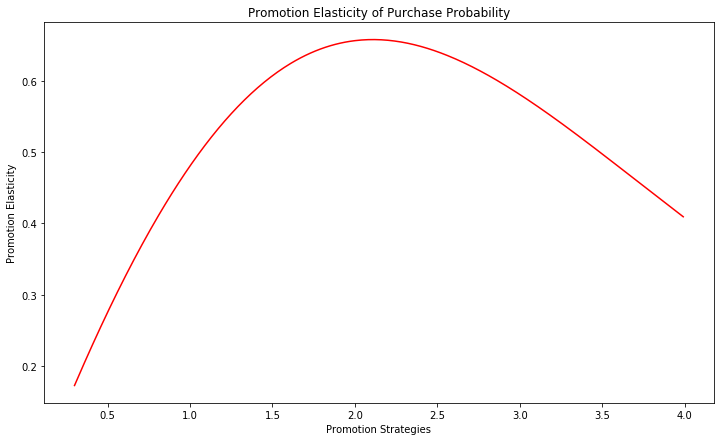

In [120]:
#Plot the promotion elasticity visual
plt.figure(figsize=(12,7))
plt.plot(P_range, pe_promo, color="r")

plt.xlabel("Promotion Strategies")
plt.ylabel("Promotion Elasticity")
plt.title("Promotion Elasticity of Purchase Probability")

In [122]:
Price_Elasts["AVG Promotion Elasticity"]=pe_promo
Price_Elasts.head()

,Pricing,AVG Price Elasticity,AVG Price Elasticity Seg 1,AVG Price Elasticity Seg 2,AVG Price Elasticity Seg 3,AVG Promotion Elasticity
0,0.30,-0.037253,-0.052588,-0.101076,-0.081333,0.172498
1,0.31,-0.039365,-0.055188,-0.105673,-0.084899,0.177871
2,0.32,-0.041552,-0.057854,-0.110361,-0.088527,0.183219
3,0.33,-0.043816,-0.060589,-0.115139,-0.092217,0.188541
4,0.34,-0.046160,-0.063392,-0.120008,-0.095970,0.193837


Text(0.5, 1.0, 'Comparision of Promotion and Price Elasticity of Purchase Probability')

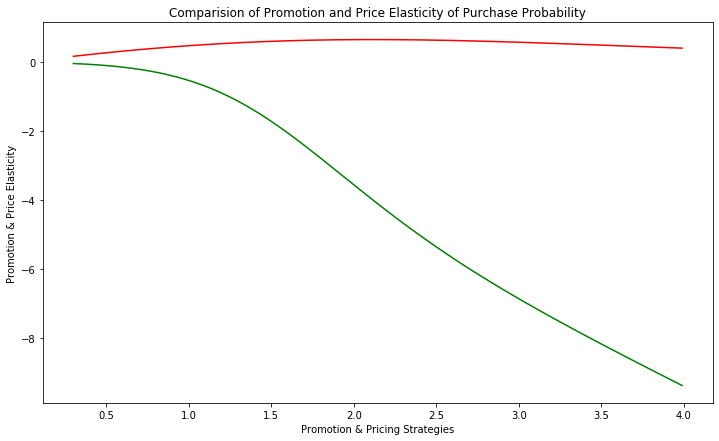

In [124]:
#Plot the new viusals
plt.figure(figsize=(12,7))
plt.plot(P_range, pe_promo, color="r")
plt.plot(P_range, pe, color="g")
plt.xlabel("Promotion & Pricing Strategies")
plt.ylabel("Promotion & Price Elasticity")
plt.title("Comparision of Promotion and Price Elasticity of Purchase Probability")

#                                                     The End